# Introduction to pandas

The Pandas library is built on NumPy and provides easy-to-use data structures and data analysis tools for the Python programming language.

pandas is a Python library that provides a collection of powerful data structures to better help you manage data. We will cover how to use the Series and DataFrame objects to handle data. These objects have a strong integration with NumPy allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.


## Content


- Time Series Analysis with pandas
    - Inspecting
    - Plotting
    - Calculating simple statictics
    
    
- pandas DataFrame basics
    - Creating and Inspecting
    - Adding, Removing Columns
    - Combining DataFrames/Series

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas DataFrame, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

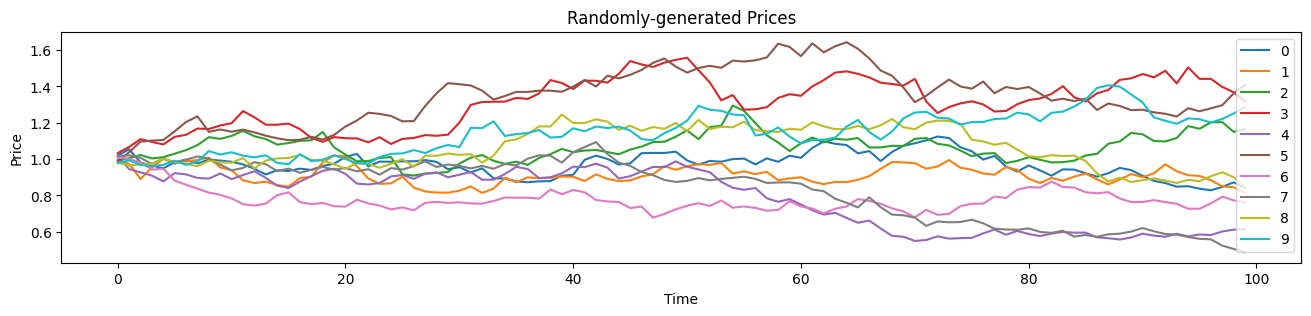

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))

prices = returns.cumprod()

prices.plot(figsize=(16, 3))

plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0)

plt.show()

### Time Series Analysis with pandas
- Inspecting
- Plotting
- Calculating sipmple statictics

In [3]:
!pip install yfinance

In [3]:
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2020-07-30")

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167587,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742638,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


In [164]:
# in case you can't install yfinance

# data = pd.read_csv('aapl_data.csv', index_col='Date')

In [4]:
prices = data['Close']

prices.head()

Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64

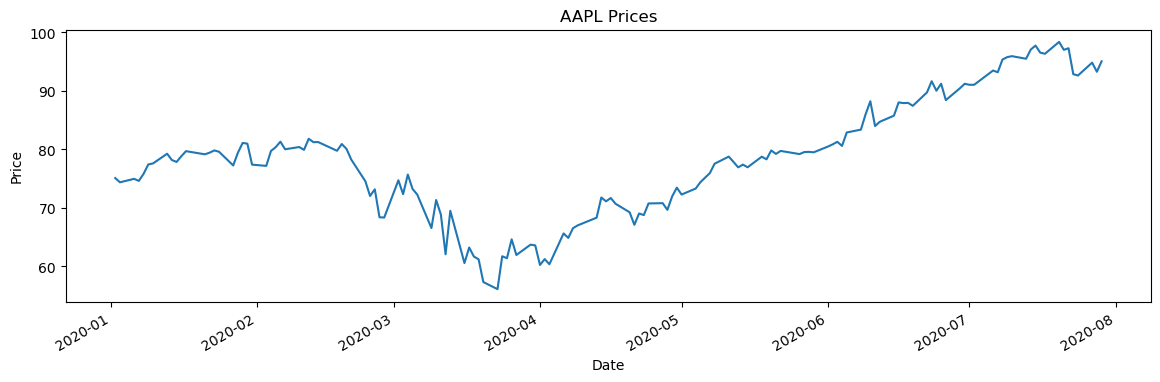

In [6]:
prices.plot(figsize=(14, 4))

plt.title("AAPL Prices")
plt.ylabel("Price")
plt.xlabel("Date")

plt.show()

As well as some built-in descriptive statistics. We can either calculate these individually or using the describe() method.

#### Task: calculate mean and std of historical price

In [6]:
print("Mean: ",prices.mean() )

print("Standard deviation: ", prices.std())

Mean:  78.21679287614494
Standard deviation:  10.090605601105718


In [8]:
print("Summary Statistics\n")

print() 

Summary Statistics




Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [10]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [11]:
prices.diff()[:5]

Date
2020-01-02         NaN
2020-01-03   -0.730003
2020-01-06    0.592499
2020-01-07   -0.352493
2020-01-08    1.199997
Name: Close, dtype: float64

#### Task: plot return series

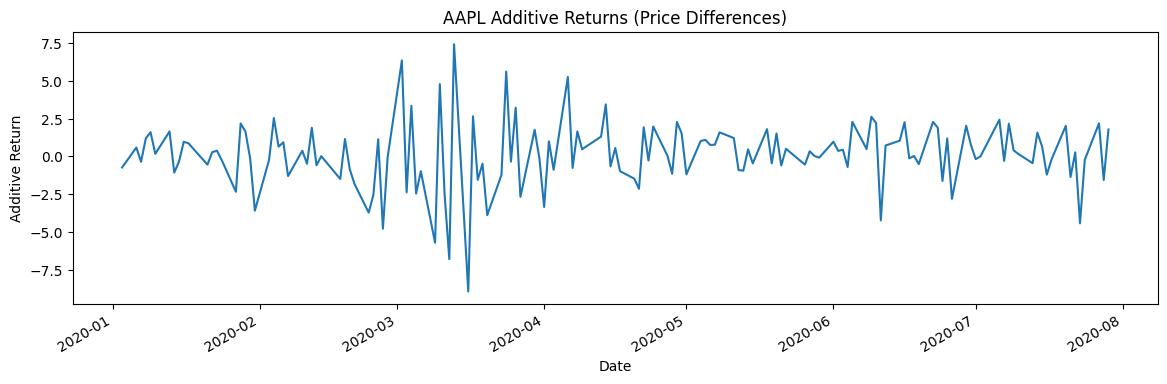

In [12]:
plt.figure(figsize=(14, 4))
add_returns.plot()
plt.title("AAPL Additive Returns (Price Differences)")
plt.ylabel("Additive Return")
plt.xlabel("Date")
plt.show()

#### Task: calculate rolling mean of returns and plot return series in one plot with correct labels

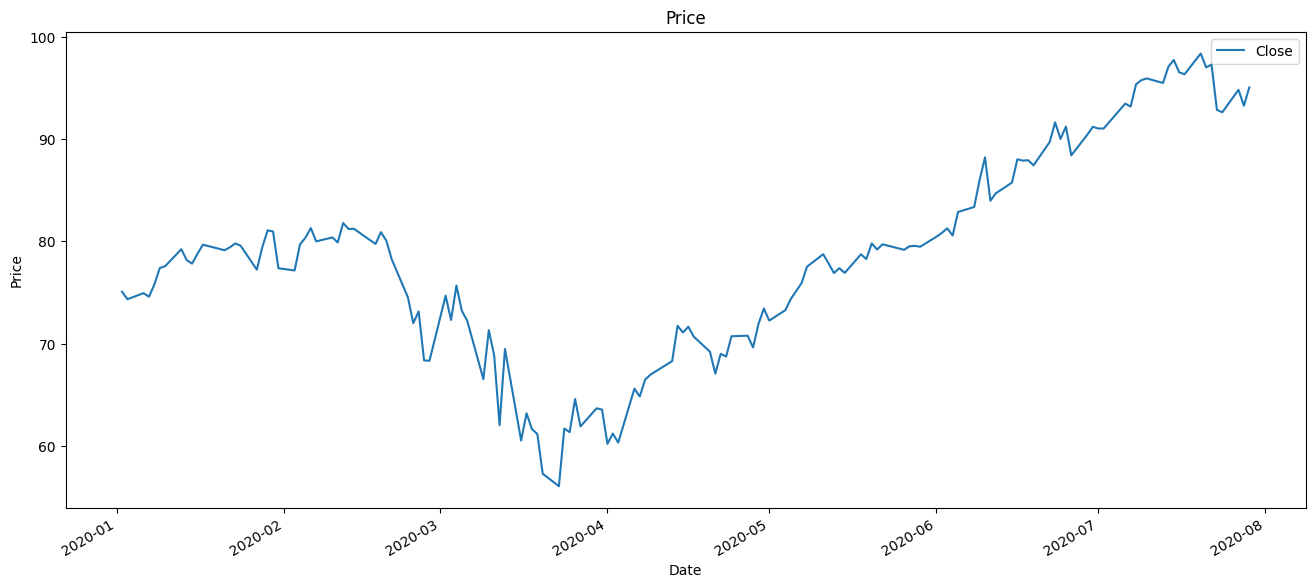

In [13]:
prices.plot(figsize=(16, 7))

rolling_mean = mult_returns.rolling(window=20).mean()


plt.title("Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

#### Task: calculate and plot the standard deviation with a 60 day window.

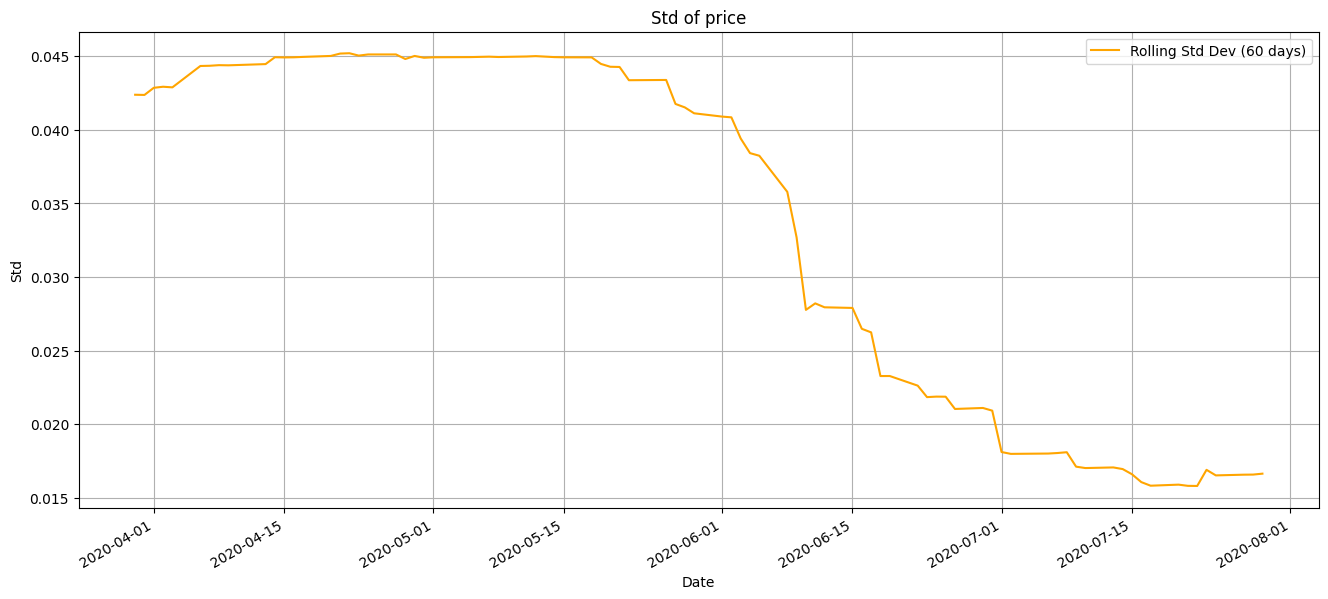

In [14]:
rolling_std = mult_returns.rolling(window=60).std()
plt.figure(figsize=(16, 7))
rolling_std.plot(label="Rolling Std Dev (60 days)", color='orange')



plt.title("Std of price")
plt.xlabel("Date")
plt.ylabel("Std")
plt.grid()
plt.legend()

plt.show()

### pandas DataFrame basics
- Creating and Inspecting
- Adding, Removing Columns
- Combining DataFrames/Series

#### Accessing DataFrame elements

In [35]:
data = yf.download("AAPL MSFT MCD", start="2019-01-01", end="2020-05-30", group_by="ticker")

data.head()

[*********************100%%**********************]  3 of 3 completed


Ticker            MSFT                                                 \
Price             Open        High         Low       Close  Adj Close   
Date                                                                    
2019-01-02   99.550003  101.750000   98.940002  101.120003  95.501312   
2019-01-03  100.099998  100.190002   97.199997   97.400002  91.988007   
2019-01-04   99.720001  102.510002   98.930000  101.930000  96.266304   
2019-01-07  101.639999  103.269997  100.980003  102.059998  96.389091   
2019-01-08  103.040001  103.970001  101.709999  102.800003  97.087975   

Ticker                       MCD                                      \
Price         Volume        Open        High         Low       Close   
Date                                                                   
2019-01-02  35329300  175.410004  176.300003  174.169998  176.059998   
2019-01-03  42579100  175.449997  176.449997  174.410004  174.899994   
2019-01-04  44060600  176.029999  179.199997  175.690002  178.279999   
2019-01-07  35656100  178.139999  181.880005  178.139999  180.220001   
2019-01-08  31514400  181.960007  182.289993  179.910004  180.600006   

Ticker                                AAPL                                   \
Price        Adj Close   Volume       Open       High        Low      Close   
Date                                                                          
2019-01-02  154.040115  2571500  38.722500  39.712502  38.557499  39.480000   
2019-01-03  153.025192  3728200  35.994999  36.430000  35.500000  35.547501   
2019-01-04  155.982422  3194300  36.132500  37.137501  35.950001  37.064999   
2019-01-07  157.679825  3283000  37.174999  37.207500  36.474998  36.982498   
2019-01-08  158.012283  2941400  37.389999  37.955002  37.130001  37.687500   

Ticker                            
Price       Adj Close     Volume  
Date                              
2019-01-02  37.750088  148158800  
2019-01-03  33.989902  365248800  
2019-01-04  35.440899  234428400  
2019-01-07  35.362022  219111200  
2019-01-08  36.036129  164101200

In [177]:
# in case you can't install yfinance

# data = pd.read_csv('aapl_msft_mcd.csv', header=[0, 1], index_col=0)

#### Task: check shape, columns and print first 7 rows of our data frame for Microsoft Low Price

In [178]:
print("Shape of data:", data.shape)

(355, 18)

In [40]:
print(data.columns.levels[0])

Index(['AAPL', 'MCD', 'MSFT'], dtype='object', name='Ticker')


In [37]:
msft_low_prices = data['MSFT']['Low']

In [39]:
msft_low_prices.head(7)

Date
2019-01-02     98.940002
2019-01-03     97.199997
2019-01-04     98.930000
2019-01-07    100.980003
2019-01-08    101.709999
2019-01-09    103.239998
2019-01-10    102.379997
Name: Low, dtype: float64

In [56]:
prices = []

for ticker in data.columns.levels[0]:

    temp = data[ticker]['Close']
    temp.name = ticker
    prices.append(temp)

    
prices = pd.concat(prices, axis=1)

prices.head()
prices.shape

(355, 3)

#### Adding, Removing Columns, Combining DataFrames/Series

It is all well and good when you already have a DataFrame filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the .loc[:, 'COL_NAME'] notation and store the output of get_pricing() (which returns a pandas Series if we only pass one security) there. This is the method that we would use to add a Series to an existing DataFrame.

#### Task: download close prices for "CMG" ticker and add it to our dataframe prices using .loc.

Specify correct start and end dates as "2019-01-01" and "2020-05-30".

In [57]:
cmg_data = yf.download("CMG", start="2019-01-01", end="2020-05-30")
cmg_close = cmg_data['Close'].rename('CMG')  

prices.loc[:, "CMG"] = cmg_data['Close']

#prices = pd.concat([prices, cmg_close], axis=1)
prices




[*********************100%%**********************]  1 of 1 completed


,AAPL,MCD,MSFT,CMG
Date,,,,
2019-01-02,39.480000,176.059998,101.120003,8.867200
2019-01-03,35.547501,174.899994,97.400002,8.789000
2019-01-04,37.064999,178.279999,101.930000,9.100000
2019-01-07,36.982498,180.220001,102.059998,9.703000
2019-01-08,37.687500,180.600006,102.800003,9.947400
...,...,...,...,...
2020-05-22,79.722504,184.410004,183.509995,21.114000
2020-05-26,79.182503,184.839996,181.570007,20.340000
2020-05-27,79.527496,187.720001,181.809998,19.799999


In [58]:
prices.iloc[78:85,:]

,AAPL,MCD,MSFT,CMG
Date,,,,
2019-04-25,51.320000,197.929993,129.149994,13.5614
2019-04-26,51.075001,197.419998,129.889999,13.5358
2019-04-29,51.152500,197.119995,129.770004,13.5580
2019-04-30,50.167500,197.570007,130.600006,13.7608
2019-05-01,52.630001,194.169998,127.879997,13.7712
2019-05-02,52.287498,194.610001,126.209999,14.1574
2019-05-03,52.937500,197.520004,128.899994,14.1904


#### Task:  remove a column MCD.

In [59]:
prices = prices.drop(columns=['MCD'])

prices.head(5)

,AAPL,MSFT,CMG
Date,,,
2019-01-02,39.480000,101.120003,8.8672
2019-01-03,35.547501,97.400002,8.7890
2019-01-04,37.064999,101.930000,9.1000
2019-01-07,36.982498,102.059998,9.7030
2019-01-08,37.687500,102.800003,9.9474


#### Task: plot all series in one plot with correct labels

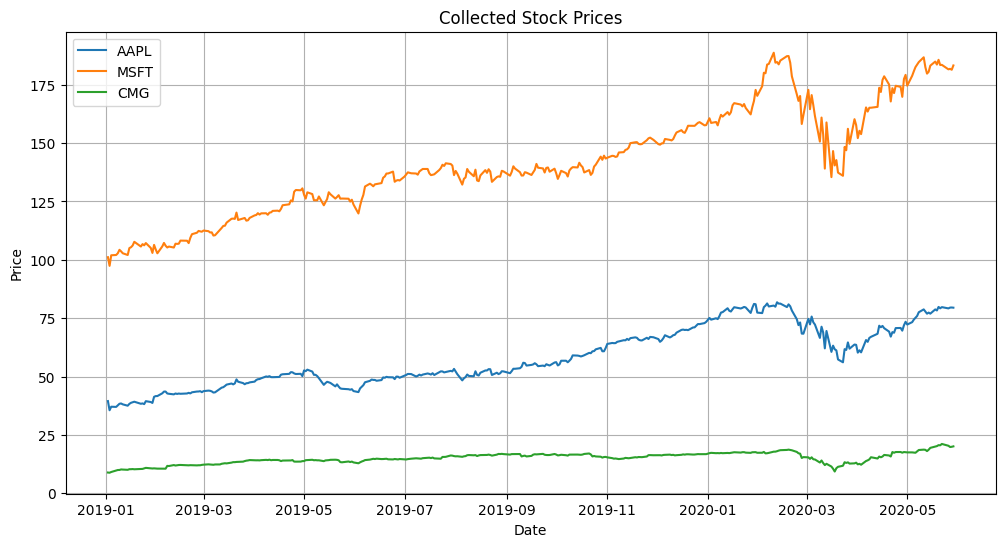

In [60]:
plt.figure(figsize=(12, 6))

for column in prices.columns:
    plt.plot(prices.index, prices[column], label=column)

plt.title("Collected Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.legend()

plt.show()

#### Task: calculate mean and std of historical price

In [67]:
for col in prices.columns:
    print(f'{col}: {prices[col].mean():.4}')

AAPL: 58.2
MSFT: 141.5
CMG: 15.02


In [68]:
for col in prices.columns:
    print(f'{col}: {prices[col].std():.4}')

AAPL: 12.57
MSFT: 22.65
CMG: 2.326


In [69]:
prices.describe()

,AAPL,MSFT,CMG
count,355.000000,355.000000,355.00000
mean,58.196106,141.545887,15.02455
std,12.570888,22.651722,2.32575
min,35.547501,97.400002,8.78900
25%,48.805000,125.924999,13.75310
50%,54.687500,138.240005,15.27640
75%,68.772499,157.644997,16.59420
max,81.800003,188.699997,21.11400


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.
#### Task: calculate returns of 3 tickets, normalize them and plot them.

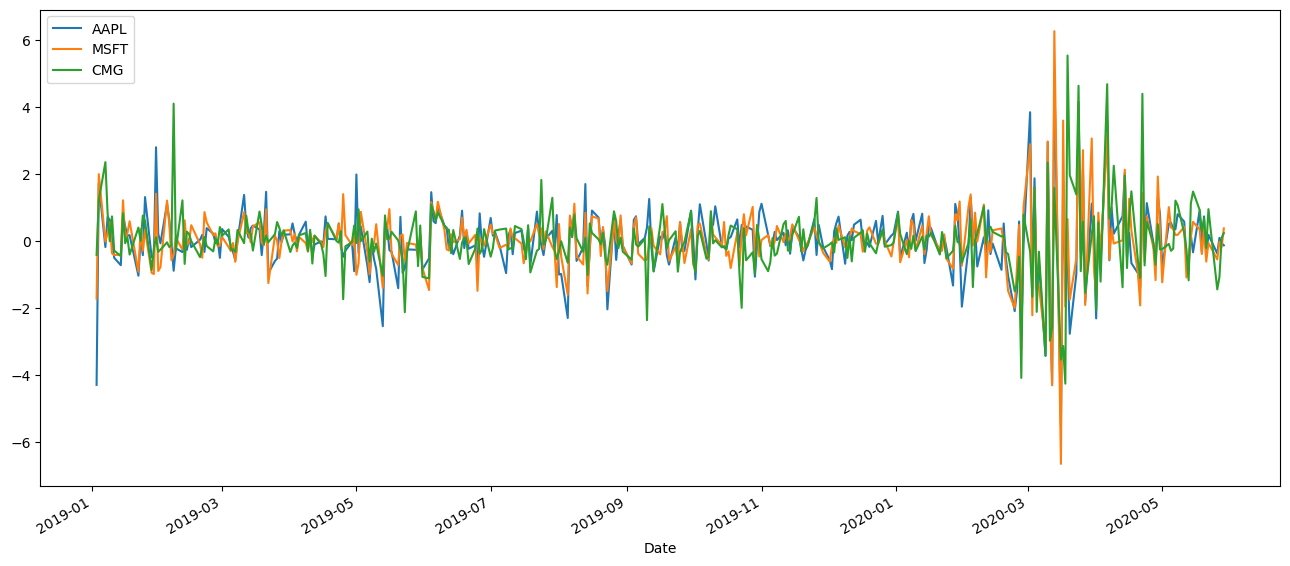

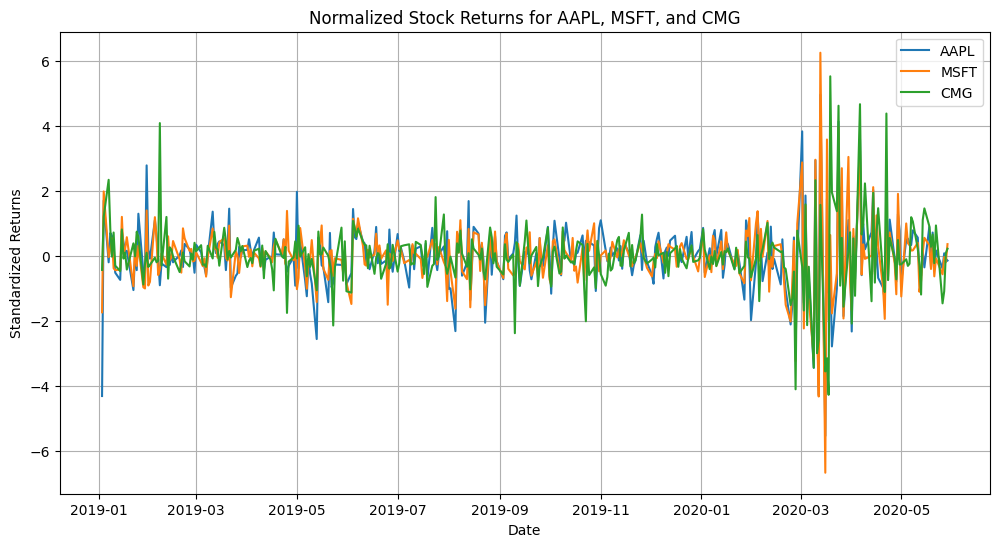

In [70]:
returns = prices.pct_change().dropna()

normalized_returns = (returns - returns.mean()) / returns.std()

plt.figure(figsize=(12, 6))

for column in normalized_returns.columns:
    plt.plot(normalized_returns.index, normalized_returns[column], label=column)

plt.title("Normalized Stock Returns for AAPL, MSFT, and CMG")
plt.xlabel("Date")
plt.ylabel("Standardized Returns")

plt.grid()
plt.legend()

plt.show()
